In [1]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [4]:
model=keras.Sequential() #Create a network sequence.

model.add(Input(shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(120,activation = 'tanh'))
model.add(Dense(84,activation = 'tanh'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 120)               94200     
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 dense_2 (Dense)             (None, 10)                850       
                                                                 
Total params: 105,214
Trainable params: 105,214
Non-trainable params: 0
_________________________________________________________________


In [5]:
#model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 
model.compile(optimizer='Adam',loss="sparse_categorical_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test, y_test))



Epoch 1/10
469/469 [==============================] - 5s 8ms/step - loss: 0.3421 - accuracy: 0.9030 - val_loss: 0.1885 - val_accuracy: 0.9450
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1614 - accuracy: 0.9529 - val_loss: 0.1345 - val_accuracy: 0.9593
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1139 - accuracy: 0.9666 - val_loss: 0.1062 - val_accuracy: 0.9676
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0856 - accuracy: 0.9749 - val_loss: 0.0929 - val_accuracy: 0.9710
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0670 - accuracy: 0.9801 - val_loss: 0.0840 - val_accuracy: 0.9723
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0525 - accuracy: 0.9844 - val_loss: 0.0818 - val_accuracy: 0.9747
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0425 - accuracy: 0.9872 - val_loss: 0.0744 - val_accuracy: 0.9749
Epoch 

In [6]:
score = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.0818 - accuracy: 0.9766


In [7]:
y_pred=model.predict(x_test)
y_pred.shape

(10000, 10)

In [8]:
import numpy as np
from numpy import argmax
y_pred1=argmax(y_pred,axis=1)

In [9]:
from sklearn.metrics import accuracy_score,  confusion_matrix
print(confusion_matrix(y_test,y_pred1))

accuracy_score(y_test,y_pred1)*100

[[ 970    1    2    1    0    0    2    1    3    0]
 [   0 1123    4    5    0    1    0    1    1    0]
 [   2    1 1011    7    1    0    1    6    3    0]
 [   0    0    4  996    0    1    0    4    0    5]
 [   0    1    4    0  960    0    4    3    0   10]
 [   2    0    0   31    1  843    4    1    6    4]
 [   6    2    2    1    2    4  936    1    4    0]
 [   1    2    9    1    0    0    0 1007    3    5]
 [   4    0    2    7    3    2    2    4  948    2]
 [   2    3    0   10    9    2    0   10    1  972]]


97.66

[7.8734462e-07 5.8477710e-08 6.1683422e-06 7.5703539e-04 1.3774955e-07
 8.9647898e-08 1.3639727e-10 9.9921918e-01 5.4569118e-06 1.1129286e-05]
7


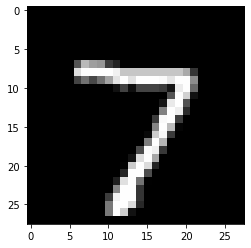

In [10]:
x_test_final=x_test.reshape(-1, 28,28)
plt.imshow(x_test_final[0],cmap="gray")
print(y_pred[0])
print(y_pred1[0])

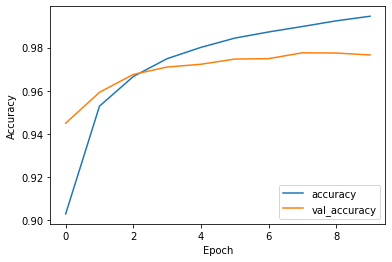

In [11]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')